### Homework assignment will go here: 

For 1d, 2d, and 3d:

- Calculate and plot $\sigma^2$ as a function of $n$. 
- Compute a linear fit of $\sigma^2$ as a function of $n$, and also plot that. 
- Compute the diffusion constant $D$ in each of 1d,2d,3d

In [355]:
%pylab inline
import tensorflow as tf

Populating the interactive namespace from numpy and matplotlib


In [356]:
import tf_setCPU

In [357]:
# setup walkers
nwalkers = 1000   # number of walkers
nsteps = 5000     # number of steps
n = np.arange(nsteps)   # a numpy array of steps
choices = [-1, 0, 1]   # choices given for each step

In [358]:
# define a function to get the average variance and the mean square displacement over the walkers
def sigma2(x):
    '''
    input position with a shape (steps, walkers,dimension), output sigma^2_n and r2
    '''
    x = tf.cast(x,dtype=float)
    x4 = tf.math.reduce_mean(x**4,axis=1)
    x2 = tf.math.reduce_mean(x**2,axis=1)
    sig2 = tf.math.sqrt(x4-x2**2)
    sigma2 = tf.math.reduce_sum(sig2,axis=1)
    r2 = tf.math.reduce_sum(x2,axis=1)
    return sigma2 ,r2


# 1-d

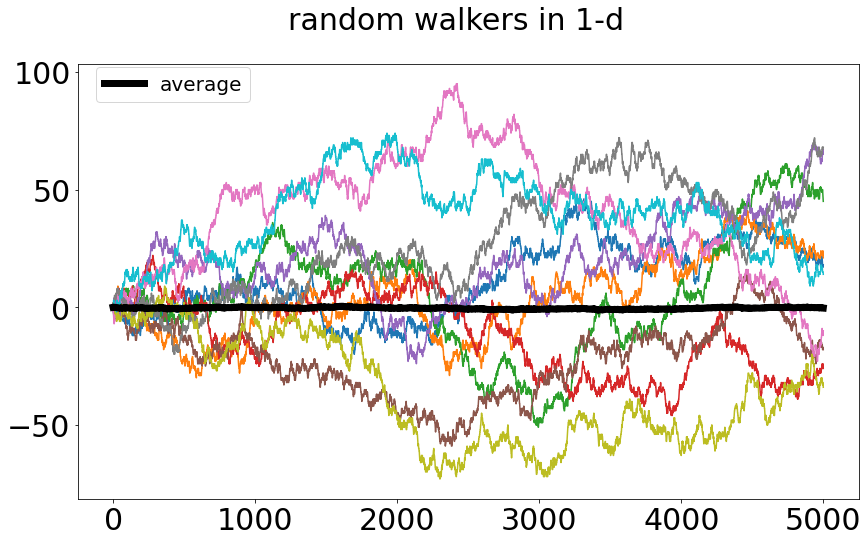

In [359]:
# use tf.random to simulate all step choices
steps1d = tf.random.uniform((nsteps,nwalkers,1),minval=-1,maxval=2,dtype=int64)

# sum all steps up to get the displacement
x1d = tf.math.cumsum(steps1d,axis=0)

# check the first 10 walkers & average displacement
fig, ax = plt.subplots(1,1,figsize=(14,8))
ax.plot(x1d[:,:10,0])
ax.plot(tf.math.reduce_mean(tf.cast(x1d,dtype=float),axis=1),color='black',linewidth=7,label='average')
ax.tick_params(axis='both',labelsize=30)
fig.suptitle('random walkers in 1-d',fontsize=30)
fig.legend(loc=(0.11,0.81),fontsize=20)
show()

# 2-d

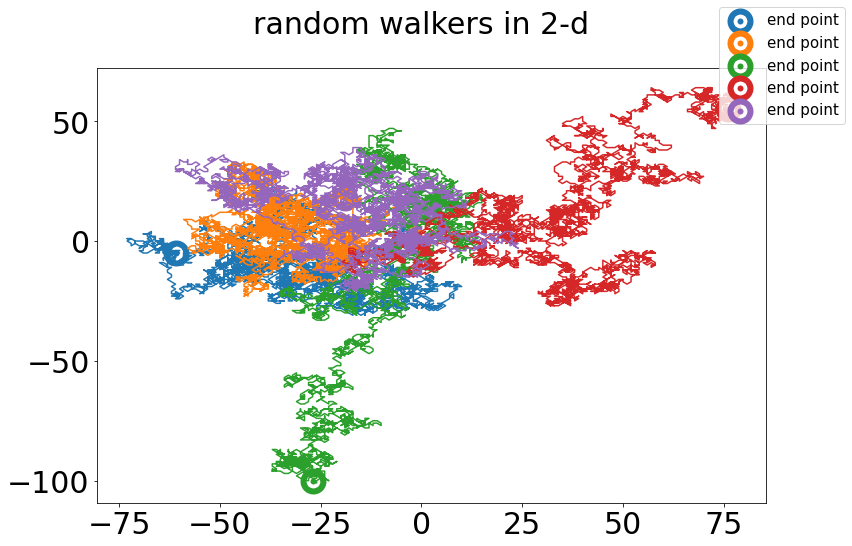

In [360]:
# use tf.random to simulate all step choices
steps2d = tf.random.uniform((nsteps,nwalkers,2),minval=-1,maxval=2,dtype=int64)

# sum all steps up to get the displacement
x2d = tf.math.cumsum(steps2d,axis=0)

# check the first 5 walkers
fig, ax = plt.subplots(1,1,figsize=(12,8))
for i in np.arange(5):
    ax.scatter(x2d[-1,i,0],x2d[-1,i,1],marker='o',linewidth=20,label='end point')
ax.plot(x2d[:,:5,0],x2d[:,:5,1])
ax.tick_params(axis='both',labelsize=30)
fig.suptitle('random walkers in 2-d',fontsize=30)
fig.legend(loc=1,fontsize=15)
show()

# 3-d

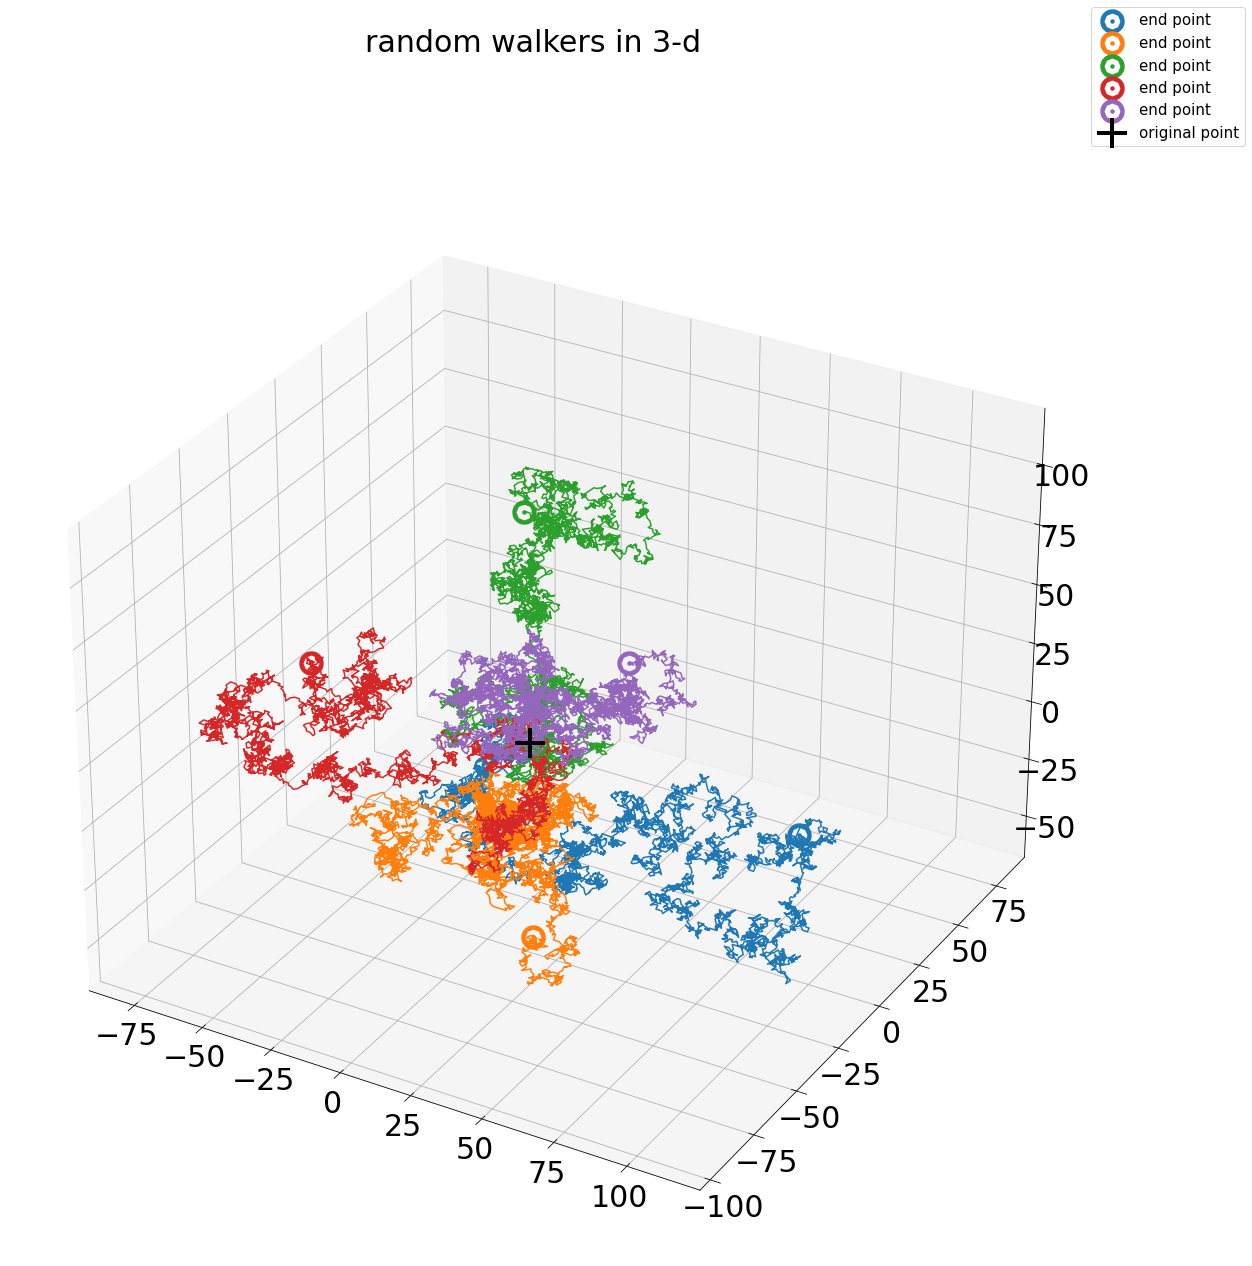

In [367]:
# use tf.random to simulate all step choices
steps3d = tf.random.uniform((nsteps,nwalkers,3),minval=-1,maxval=2,dtype=int64)

# sum all steps up to get the displacement
x3d = tf.math.cumsum(steps3d,axis=0)

# check the first 5 walkers
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')
for i in np.arange(5):
    ax.plot(x3d[:,i,0],x3d[:,i,1],x3d[:,i,2])
    ax.scatter(x3d[-1,i,0],x3d[-1,i,1],x3d[-1,i,2],marker='o',linewidth=20,label='end point')
ax.scatter(0,0,0,label='original point',marker='+',color='black',linewidth=30)
ax.tick_params(axis='both',labelsize=30)
fig.suptitle('random walkers in 3-d',fontsize=30)
fig.legend(loc=1,fontsize=15)
show()

Calculate $\sigma^2$ and 
$\left< {|\overrightarrow{x_n}|}^2 \right>$

In [368]:
# get sigma^2,its fit and <xn^2>
# 1-d
sigma2_1d,xn2_1d = sigma2(x1d)
sigfit_1d = np.polyfit(n,sigma2_1d,1)
xn2fit_1d = np.polyfit(n,xn2_1d,1)


# 2-d
sigma2_2d,xn2_2d = sigma2(x2d)
sigfit_2d = np.polyfit(n,sigma2_2d,1)
xn2fit_2d = np.polyfit(n,xn2_2d,1)

# 3-d
sigma2_3d,xn2_3d = sigma2(x3d)
sigfit_3d = np.polyfit(n,sigma2_3d,1)
xn2fit_3d = np.polyfit(n,xn2_3d,1)

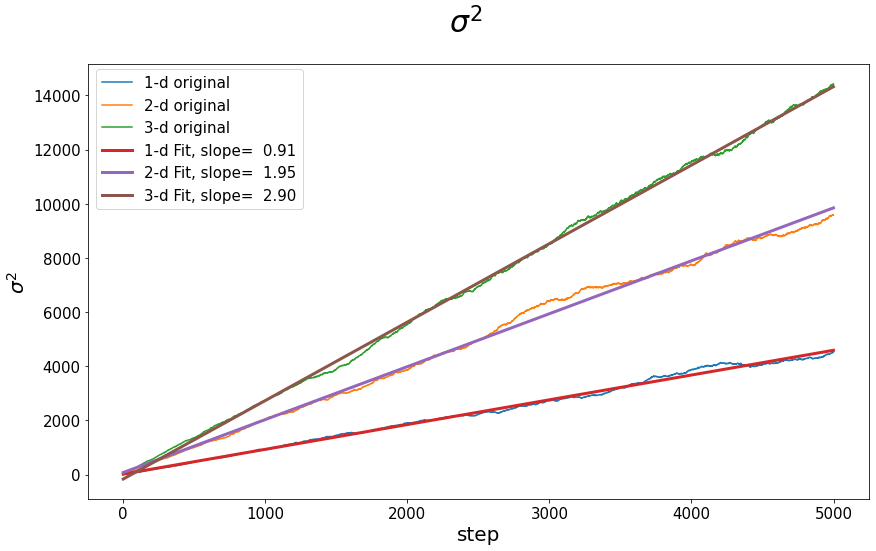

In [381]:
# plot sigma^2 and its fit 
fig, ax = plt.subplots(1,1,figsize=(14,8))


ax.plot(sigma2_1d,label='1-d original')
ax.plot(sigma2_2d,label='2-d original')
ax.plot(sigma2_3d,label='3-d original')

ax.plot(sigfit_1d[0]*n+sigfit_1d[1],label='1-d Fit, slope=%6.2f' % sigfit_1d[0],linewidth=3)
ax.plot(sigfit_2d[0]*n+sigfit_2d[1],label='2-d Fit, slope=%6.2f' % sigfit_2d[0],linewidth=3)
ax.plot(sigfit_3d[0]*n+sigfit_3d[1],label='3-d Fit, slope=%6.2f' % sigfit_3d[0],linewidth=3)

fig.suptitle(r'$\sigma^2$',fontsize=30) 
fig.legend(loc=(0.11,0.62),fontsize=15)
ax.tick_params(axis='both',labelsize=15)
ax.set_xlabel("step",fontsize=20)
ax.set_ylabel(r"$\sigma^2$",fontsize=20)
show()

In [369]:
print('linear fit for 1-d sigma square: sigma^2 = {0:.2f}*n {1:.2f}'.format(sigfit_1d[0],sigfit_1d[1]))
print('linear fit for 1-d sigma square: sigma^2 = {0:.2f}*n {1:.2f}'.format(sigfit_2d[0],sigfit_2d[1]))
print('linear fit for 1-d sigma square: sigma^2 = {0:.2f}*n {1:.2f}'.format(sigfit_3d[0],sigfit_3d[1]))

linear fit for 1-d sigma square: sigma^2 = 0.91*n 17.06
linear fit for 1-d sigma square: sigma^2 = 1.95*n 75.43
linear fit for 1-d sigma square: sigma^2 = 2.90*n -165.56


In [393]:
print('the diffusion coefficient for 1-d: D = {0:.2f} with an error of {1:.2f}%'.format(sigfit_1d[0]/2,np.abs(sigfit_1d[0]/2-0.5)/0.5*100))
print('the diffusion coefficient for 2-d: D = {0:.2f} with an error of {1:.2f}%'.format(sigfit_2d[0]/4,np.abs(sigfit_2d[0]/4-0.5)/0.5*100))
print('the diffusion coefficient for 3-d: D = {0:.2f} with an error of {1:.2f}%'.format(sigfit_3d[0]/6,np.abs(sigfit_3d[0]/6-0.5)/0.5*100))

the diffusion coefficient for 1-d: D = 0.46 with an error of 8.56%
the diffusion coefficient for 2-d: D = 0.49 with an error of 2.29%
the diffusion coefficient for 3-d: D = 0.48 with an error of 3.42%


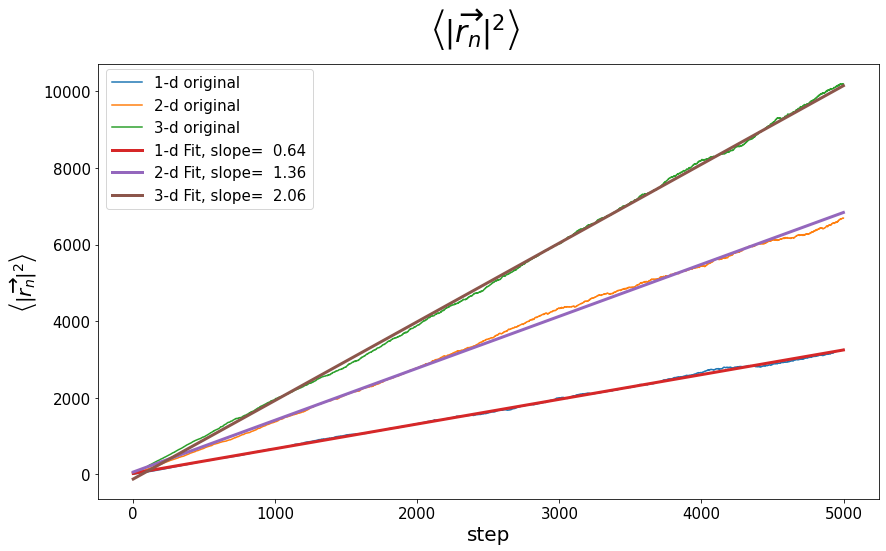

In [397]:
# Plot the mean displacement 

fig, ax = plt.subplots(1,1,figsize=(14,8))

ax.plot(xn2_1d,label='1-d original')
ax.plot(xn2_2d,label='2-d original')
ax.plot(xn2_3d,label='3-d original')

ax.plot(xn2fit_1d[0]*n+xn2fit_1d[1],label='1-d Fit, slope=%6.2f' % xn2fit_1d[0],linewidth=3)
ax.plot(xn2fit_2d[0]*n+xn2fit_2d[1],label='2-d Fit, slope=%6.2f' % xn2fit_2d[0],linewidth=3)
ax.plot(xn2fit_3d[0]*n+xn2fit_3d[1],label='3-d Fit, slope=%6.2f' % xn2fit_3d[0],linewidth=3)

fig.suptitle(r'$\left< {|\overrightarrow{r_n}|}^2 \right>$',fontsize=30) 
fig.legend(loc=(0.12,0.62),fontsize=15)
ax.tick_params(axis='both',labelsize=15)
ax.set_xlabel("step",fontsize=20)
ax.set_ylabel(r"$\left< {|\overrightarrow{r_n}|}^2 \right>$",fontsize=20)
show()


We actually see the slope of $\left< {|\overrightarrow{x_n}|}^2 \right>$ is not close to d (dimension) but to 2/3*d. This is due to the three options we have [-1,0,1] here for each step. Thus, (for 1-d)
$$
\left< x_n^2 \right> = \left< \sum_{i} s_i^2 \right> + \left< \sum_i \sum_{j \neq i} s_i s_j \right>
$$

$$
= 
\left< \sum_{i} s_i^2 \right> =[\frac{1}{3}(-1)^2 + \frac{1}{3}(0)^2 + \frac{1}{3}(1)^2] * n
$$
$$
= \frac{2}{3}n
$$

And the result we have (0.64) is close to the theoretical result 0.6667.

The confusion coefficient D, has a relation with the variance $\sigma^2$:
$$
\sigma^2 = 2Dt*d
$$

where d represents the dimension, while we're also expecting $\sigma^2=td$. Combining these two equations we can find that $D=\frac{1}{2}$ and it's independent on the dimension.